In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,  random_state=0)

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

svm = SVC()

svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)

print(f'Test score: {svm.score(X_test_scaled, y_test)}')

Test score: 0.972027972027972


In [2]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001,0.01,0.1,1,10,100]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print(f'Best cross-validation accuracy: {grid.best_score_}')
print(f'Best set score: {grid.score(X_test_scaled, y_test)}')
print(f'Best parameters: {grid.best_params_}')

Best cross-validation accuracy: 0.9812311901504789
Best set score: 0.972027972027972
Best parameters: {'C': 1, 'gamma': 1}


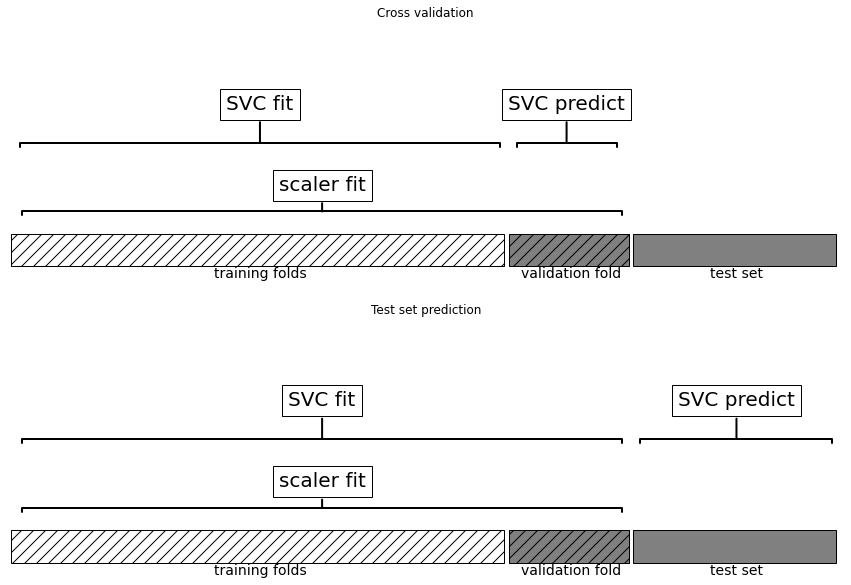

In [3]:
import mglearn
mglearn.plots.plot_improper_processing()

In [4]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC())])

In [5]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svm', SVC())])

In [6]:
print(f'Test score: {pipe.score(X_test, y_test)}')

Test score: 0.972027972027972


In [7]:
param_grid  = {'svm__C': [0.001,0.01, 0.1, 1,10,100], 'svm__gamma': [0.001, 0.01, 0.1, 1,10,100]}


In [8]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print(f'Best cross-validaition accuracy: {grid.best_score_}')
print(f'Test set score: {grid.score(X_test, y_test)}')
print(f'Best parameters: {grid.best_params_}')

Best cross-validaition accuracy: 0.9812311901504789
Test set score: 0.972027972027972
Best parameters: {'svm__C': 1, 'svm__gamma': 1}


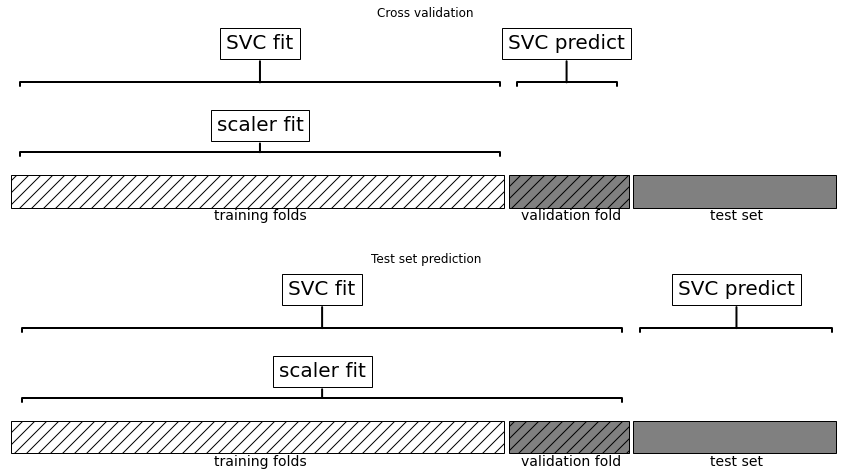

In [9]:
mglearn.plots.plot_proper_processing()

In [10]:
import numpy as np
rnd  = np.random.RandomState(seed=0)
X = rnd.normal(size=(100,10000))
y = rnd.normal(size=(100,))


In [11]:
from sklearn.feature_selection import SelectPercentile, f_regression

select = SelectPercentile(score_func=f_regression, percentile=5).fit(X, y)
X_selected = select.transform(X)
print(f'X_selected.shape: {X_selected.shape}')

X_selected.shape: (100, 500)


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
print(f'Cross-validation accuracy (cv only on ridge): {np.mean(cross_val_score(Ridge(), X_selected, y, cv=5))}')

Cross-validation accuracy (cv only on ridge): 0.9057953065239822


In [14]:
pipe = Pipeline([('select', SelectPercentile(score_func=f_regression, percentile=5)), ('ridge', Ridge())])
print(f'Cross-validation accuracy (pipeline): {np.mean(cross_val_score(pipe, X, y , cv=5))}')

Cross-validation accuracy (pipeline): -0.24655422384952813


In [16]:
def fit(self , X, y):
    X_transformed = X
    for name, estimator in self.steps[:-1]:
        X_transformed = estimator.fit_transform(X_transformed, y)
    self.step[-1][1].fit(X_transformed, y)
    return self

def predict(self, X):
    X_transformed = X
    for step  in self.steps[:-1]:
        X_transformed = step[1].transform(X_transformed)
    return self.step[-1][1].predict(X_transformed)


In [17]:
from sklearn.pipeline import make_pipeline

pipe_log = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC(C=100))])

pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

In [18]:
print(f'Pipeline steps: \n{pipe_short.steps}')

Pipeline steps: 
[('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=100))]


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
print(f'Pipeline steps: {pipe.steps}')

Pipeline steps: [('standardscaler-1', StandardScaler()), ('pca', PCA(n_components=2)), ('standardscaler-2', StandardScaler())]


In [20]:
pipe.fit(cancer.data)

Pipeline(steps=[('standardscaler-1', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('standardscaler-2', StandardScaler())])

In [21]:
components = pipe.named_steps['pca'].components_
print(f'components.shape: {components.shape}')

components.shape: (2, 30)


In [26]:
from sklearn.linear_model import LogisticRegression

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1500))


In [27]:
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}


In [28]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=4)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train ,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1500))]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]})

In [29]:
print(f'Best estimator:\n{grid.best_estimator_}')

Best estimator:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1, max_iter=1500))])


In [31]:
print('Logistic regression step:\n{}'.format(grid.best_estimator_.named_steps['logisticregression']))

Logistic regression step:
LogisticRegression(C=1, max_iter=1500)


In [32]:
print('Logistic regression coefficient: \n{}'.format(grid.best_estimator_.named_steps['logisticregression'].coef_))

Logistic regression coefficient: 
[[-0.43570655 -0.34266946 -0.40809443 -0.5344574  -0.14971847  0.61034122
  -0.72634347 -0.78538827  0.03886087  0.27497198 -1.29780109  0.04926005
  -0.67336941 -0.93447426 -0.13939555  0.45032641 -0.13009864 -0.10144273
   0.43432027  0.71596578 -1.09068862 -1.09463976 -0.85183755 -1.06406198
  -0.74316099  0.07252425 -0.82323903 -0.65321239 -0.64379499 -0.42026013]]


In [33]:
from sklearn.datasets import load_boston
boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)


from  sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(
StandardScaler(), 
PolynomialFeatures(), 
Ridge())

param_grid = {'polynomialfeatures__degree': [1,2,3], 'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}




/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

In [34]:
grid = GridSearchCV(pipe, param_grid=param_grid,cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

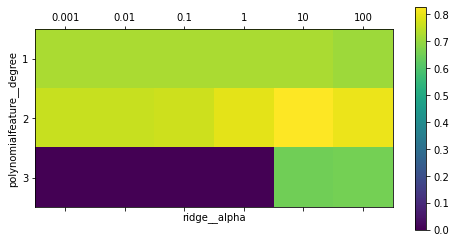

In [36]:
import matplotlib.pyplot as plt

plt.matshow(grid.cv_results_['mean_test_score'].reshape(3,-1), vmin=0, cmap='viridis')

plt.xlabel('ridge__alpha')
plt.ylabel('polynomialfeature__degree')
plt.xticks(range(len(param_grid['ridge__alpha'])), param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])), param_grid['polynomialfeatures__degree'])

plt.colorbar()

In [37]:
print(f'Best parameters: {grid.best_params_}')

Best parameters: {'polynomialfeatures__degree': 2, 'ridge__alpha': 10}


In [38]:
print(f'Test-set score: {grid.score(X_test, y_test)}')

Test-set score: 0.7683045464100131


In [40]:
param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
pipe = make_pipeline(StandardScaler(), Ridge())

In [41]:
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print(f'Score without poly features: {grid.score(X_test, y_test)}')

Score without poly features: 0.6272671927504456


In [42]:
pipe  =Pipeline([('preprocessing', StandardScaler()), ('classifier',  SVC())])



In [43]:
from  sklearn.ensemble import RandomForestClassifier

param_grid = [
    {'classifier': [SVC()], 'preprocessing': [StandardScaler(), None], 'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'classifier__C': [0.001, 0.01, 0.1,1, 10, 100]}
,
{'classifier': [RandomForestClassifier(n_estimators=100)], 'preprocessing': [None], 'classifier__max_features': [1,2,3]}]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

print(f'Best params: {grid.best_params_}')
print(f'Best cross-validation score: {grid.best_score_}')
print(f'Test-set score:{grid.score(X_test, y_test)}')

Best params: {'classifier': SVC(C=10, gamma=0.01), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler()}
Best cross-validation score: 0.9858823529411765
Test-set score:0.9790209790209791


In [45]:
!tree -dL 2 data/aclImdb

data/aclImdb  [error opening dir]

0 directories


In [46]:
!ls

01-introduction.ipynb
02-supervised-learning.ipynb
03-unsupervised-learning.ipynb
04-representing-data-feature-engineering.ipynb
05-model-evaluation-and-improvement.ipynb
06-algorithm-chains-and-pipelines.ipynb
07-working-with-text-data.ipynb
08-conclusion.ipynb
README.md
cache
ch03.ipynb
ch04.ipynb
chapter1.py
chp5.ipynb
chp6.ipynb
cover.jpg
data
environment.yml
images
ls
matplotlib tutorial.ipynb
mglearn
mytree.dot
preamble.py
sk01.ipynb
sk02.ipynb
tmp
tmp.png
tree.dot


In [47]:
!ls data

adult.data    citibike.csv  ram_price.csv


In [48]:
!find aclImdb

find: aclImdb: No such file or directory


In [49]:
!tree -a .

.
├── .gitignore
├── .ipynb_checkpoints
│   ├── ch03-checkpoint.ipynb
│   ├── ch04-checkpoint.ipynb
│   ├── chp5-checkpoint.ipynb
│   ├── chp6-checkpoint.ipynb
│   ├── matplotlib tutorial-checkpoint.ipynb
│   ├── sk01-checkpoint.ipynb
│   └── sk02-checkpoint.ipynb
├── 01-introduction.ipynb
├── 02-supervised-learning.ipynb
├── 03-unsupervised-learning.ipynb
├── 04-representing-data-feature-engineering.ipynb
├── 05-model-evaluation-and-improvement.ipynb
├── 06-algorithm-chains-and-pipelines.ipynb
├── 07-working-with-text-data.ipynb
├── 08-conclusion.ipynb
├── README.md
├── cache
│   └── joblib
│       └── mglearn
│           ├── plot_nmf
│           │   └── nmf_faces
│           │       └── func_code.py
│           └── plot_pca
│               └── pca_faces
│                   ├── 4770358a3123130f0ce335e28196620b
│                   │   ├── metadata.json
│                   │   └── output.pkl
│                   └── func_code.py
├── ch03.ipynb
├── ch04.ipynb
├── chapter1.py
├── chp5.ipyn